## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  48.110366  1026.657166  0.836106  6.005033  1.548781
1  74.990170  1227.736111  0.267476  8.008260  1.372997
2  15.479764  1419.608897  0.126490  8.173186  1.365048
3  44.062278   704.764036  0.520573  2.216525  1.456625
4  84.025504  1676.258129  0.923090  5.281023  1.576707


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0259813	total: 66.4ms	remaining: 1m 6s
1:	learn: 1.0167232	total: 66.9ms	remaining: 33.4s
2:	learn: 1.0083932	total: 67.5ms	remaining: 22.4s
3:	learn: 0.9980475	total: 68ms	remaining: 16.9s
4:	learn: 0.9893983	total: 68.6ms	remaining: 13.7s
5:	learn: 0.9802319	total: 69.1ms	remaining: 11.5s
6:	learn: 0.9697584	total: 69.5ms	remaining: 9.87s
7:	learn: 0.9595907	total: 70.1ms	remaining: 8.7s
8:	learn: 0.9520150	total: 70.7ms	remaining: 7.79s
9:	learn: 0.9421417	total: 71.2ms	remaining: 7.05s
10:	learn: 0.9323447	total: 71.7ms	remaining: 6.45s
11:	learn: 0.9227650	total: 72.1ms	remaining: 5.94s
12:	learn: 0.9144923	total: 72.6ms	remaining: 5.51s
13:	learn: 0.9041970	total: 73ms	remaining: 5.14s
14:	learn: 0.8950803	total: 73.4ms	remaining: 4.82s
15:	learn: 0.8878536	total: 74ms	remaining: 4.55s
16:	learn: 0.8775543	total: 74.5ms	remaining: 4.31s
17:	learn: 0.8695562	total: 75ms	remaining: 4.09s
18:	learn: 0.8652257	total: 75.5ms	remaining: 3.9s
19

112:	learn: 0.4324394	total: 118ms	remaining: 928ms
113:	learn: 0.4297591	total: 119ms	remaining: 923ms
114:	learn: 0.4270470	total: 119ms	remaining: 917ms
115:	learn: 0.4247589	total: 120ms	remaining: 912ms
116:	learn: 0.4210002	total: 120ms	remaining: 906ms
117:	learn: 0.4187611	total: 121ms	remaining: 902ms
118:	learn: 0.4161907	total: 121ms	remaining: 897ms
119:	learn: 0.4127098	total: 121ms	remaining: 891ms
120:	learn: 0.4094606	total: 122ms	remaining: 886ms
121:	learn: 0.4078673	total: 123ms	remaining: 882ms
122:	learn: 0.4052268	total: 123ms	remaining: 877ms
123:	learn: 0.4026490	total: 123ms	remaining: 872ms
124:	learn: 0.3998046	total: 124ms	remaining: 868ms
125:	learn: 0.3982058	total: 125ms	remaining: 864ms
126:	learn: 0.3958354	total: 125ms	remaining: 859ms
127:	learn: 0.3944656	total: 125ms	remaining: 855ms
128:	learn: 0.3914338	total: 126ms	remaining: 850ms
129:	learn: 0.3881441	total: 126ms	remaining: 846ms
130:	learn: 0.3852807	total: 127ms	remaining: 841ms
131:	learn: 

257:	learn: 0.2162445	total: 182ms	remaining: 525ms
258:	learn: 0.2156248	total: 183ms	remaining: 524ms
259:	learn: 0.2151380	total: 183ms	remaining: 522ms
260:	learn: 0.2145989	total: 184ms	remaining: 520ms
261:	learn: 0.2140583	total: 184ms	remaining: 519ms
262:	learn: 0.2136331	total: 185ms	remaining: 517ms
263:	learn: 0.2131537	total: 185ms	remaining: 516ms
264:	learn: 0.2127019	total: 185ms	remaining: 514ms
265:	learn: 0.2118846	total: 186ms	remaining: 513ms
266:	learn: 0.2113752	total: 186ms	remaining: 511ms
267:	learn: 0.2108921	total: 186ms	remaining: 509ms
268:	learn: 0.2095864	total: 187ms	remaining: 508ms
269:	learn: 0.2091095	total: 187ms	remaining: 506ms
270:	learn: 0.2087402	total: 188ms	remaining: 505ms
271:	learn: 0.2083384	total: 188ms	remaining: 503ms
272:	learn: 0.2078741	total: 188ms	remaining: 502ms
273:	learn: 0.2074155	total: 189ms	remaining: 500ms
274:	learn: 0.2068551	total: 189ms	remaining: 499ms
275:	learn: 0.2063805	total: 190ms	remaining: 497ms
276:	learn: 

494:	learn: 0.1022465	total: 285ms	remaining: 290ms
495:	learn: 0.1019321	total: 285ms	remaining: 290ms
496:	learn: 0.1016220	total: 286ms	remaining: 289ms
497:	learn: 0.1010621	total: 286ms	remaining: 288ms
498:	learn: 0.1006205	total: 286ms	remaining: 288ms
499:	learn: 0.1003217	total: 287ms	remaining: 287ms
500:	learn: 0.0997612	total: 287ms	remaining: 286ms
501:	learn: 0.0992256	total: 288ms	remaining: 285ms
502:	learn: 0.0988793	total: 288ms	remaining: 285ms
503:	learn: 0.0983359	total: 289ms	remaining: 284ms
504:	learn: 0.0980629	total: 289ms	remaining: 283ms
505:	learn: 0.0976045	total: 290ms	remaining: 283ms
506:	learn: 0.0973266	total: 290ms	remaining: 282ms
507:	learn: 0.0969196	total: 290ms	remaining: 281ms
508:	learn: 0.0964717	total: 291ms	remaining: 280ms
509:	learn: 0.0962045	total: 291ms	remaining: 280ms
510:	learn: 0.0958087	total: 292ms	remaining: 279ms
511:	learn: 0.0954201	total: 292ms	remaining: 278ms
512:	learn: 0.0951434	total: 293ms	remaining: 278ms
513:	learn: 

686:	learn: 0.0576384	total: 364ms	remaining: 166ms
687:	learn: 0.0574494	total: 364ms	remaining: 165ms
688:	learn: 0.0572661	total: 365ms	remaining: 165ms
689:	learn: 0.0572185	total: 365ms	remaining: 164ms
690:	learn: 0.0570575	total: 366ms	remaining: 163ms
691:	learn: 0.0570089	total: 366ms	remaining: 163ms
692:	learn: 0.0568307	total: 366ms	remaining: 162ms
693:	learn: 0.0566802	total: 367ms	remaining: 162ms
694:	learn: 0.0564240	total: 367ms	remaining: 161ms
695:	learn: 0.0562685	total: 368ms	remaining: 161ms
696:	learn: 0.0560988	total: 368ms	remaining: 160ms
697:	learn: 0.0559333	total: 369ms	remaining: 159ms
698:	learn: 0.0557810	total: 369ms	remaining: 159ms
699:	learn: 0.0556100	total: 370ms	remaining: 158ms
700:	learn: 0.0553634	total: 370ms	remaining: 158ms
701:	learn: 0.0551976	total: 370ms	remaining: 157ms
702:	learn: 0.0550403	total: 371ms	remaining: 157ms
703:	learn: 0.0548912	total: 372ms	remaining: 156ms
704:	learn: 0.0546480	total: 372ms	remaining: 156ms
705:	learn: 

925:	learn: 0.0285244	total: 466ms	remaining: 37.3ms
926:	learn: 0.0284624	total: 467ms	remaining: 36.8ms
927:	learn: 0.0283739	total: 467ms	remaining: 36.3ms
928:	learn: 0.0282938	total: 468ms	remaining: 35.7ms
929:	learn: 0.0282309	total: 468ms	remaining: 35.2ms
930:	learn: 0.0281725	total: 468ms	remaining: 34.7ms
931:	learn: 0.0281178	total: 469ms	remaining: 34.2ms
932:	learn: 0.0280589	total: 469ms	remaining: 33.7ms
933:	learn: 0.0280006	total: 469ms	remaining: 33.2ms
934:	learn: 0.0279063	total: 470ms	remaining: 32.7ms
935:	learn: 0.0278450	total: 470ms	remaining: 32.2ms
936:	learn: 0.0277848	total: 471ms	remaining: 31.6ms
937:	learn: 0.0277014	total: 471ms	remaining: 31.1ms
938:	learn: 0.0276177	total: 472ms	remaining: 30.6ms
939:	learn: 0.0275591	total: 472ms	remaining: 30.1ms
940:	learn: 0.0274772	total: 473ms	remaining: 29.6ms
941:	learn: 0.0274216	total: 473ms	remaining: 29.1ms
942:	learn: 0.0273364	total: 474ms	remaining: 28.6ms
943:	learn: 0.0272557	total: 474ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


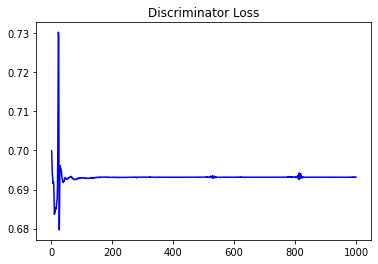

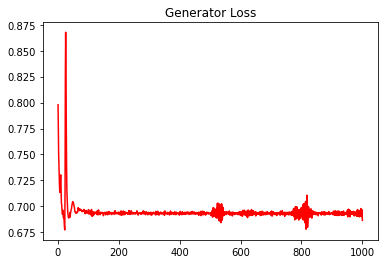

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3829130255927892


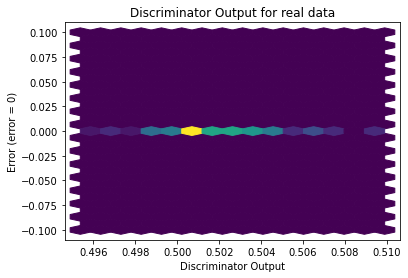

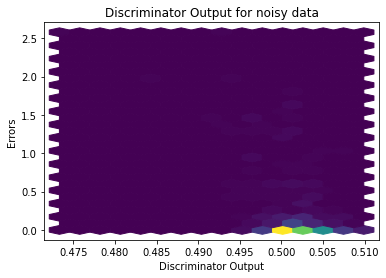

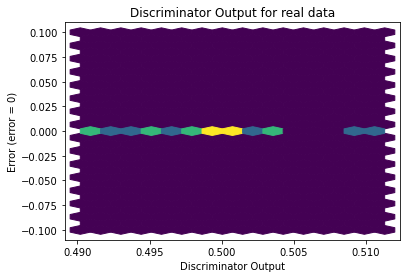

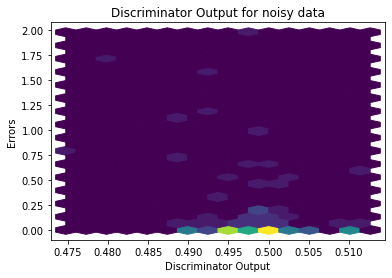

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4179]], requires_grad=True)
